# taking out members of cohort 2 with less than 120 mins and restratifying

In [1]:
import pandas as pd
import numpy as np
import glob
import ntpath
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from visits import Visit, Cohort, MissingDataError

In [2]:
details = pd.read_csv("patient_icu_ward_stay_list_deid.csv", sep=',')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,07/10/1999,NaN,Male,1,28/04/2016 11:15,29/04/2016 12:15,NaN,NaN,1,1.0,28/04/2016 19:00,5.0,NaN,PICU
1,ZI0001,07/10/1999,NaN,Male,2,07/05/2016 13:43,08/05/2016 15:25,NaN,NaN,1,1.0,07/05/2016 17:00,3.0,NaN,PICU
2,XY0002,09/06/1998,NaN,Male,1,07/01/2016 16:20,09/01/2016 16:22,NaN,NaN,1,1.0,07/01/2016 18:00,5.0,NaN,PICU
3,DX0003,04/11/1998,NaN,Female,1,24/06/2016 18:05,25/06/2016 16:22,NaN,NaN,1,1.0,25/06/2016 01:00,5.0,NaN,FLAMI
4,FK0004,09/03/1999,NaN,Female,1,03/03/2017 15:04,20/03/2017 14:17,1.0,04/03/2017 14:45,1,1.0,11/03/2017 15:00,1.0,04/03/2017 15:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,11/01/2018,NaN,Male,1,29/12/2018 21:35,31/12/2018 12:54,NaN,NaN,1,1.0,31/12/2018 00:00,5.0,NaN,PICU
5653,HK4117,28/12/2018,NaN,Male,1,28/12/2018 08:20,01/01/2019 13:15,NaN,NaN,1,1.0,28/12/2018 18:00,5.0,NaN,NICU
5654,TI4118,11/09/2016,NaN,Male,1,26/12/2018 21:20,08/01/2019 12:51,NaN,NaN,1,1.0,03/01/2019 12:00,5.0,NaN,PICU
5655,KI4119,13/05/2016,NaN,Female,1,30/12/2018 22:42,31/12/2018 16:39,NaN,NaN,0,0.0,NaN,NaN,NaN,PICU


In [3]:
details['extubation_deid_date'] = pd.to_datetime(details['extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['failed_extubation_deid_date'] = pd.to_datetime(details['failed_extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['re_intubation_deid_date'] = pd.to_datetime(details['re_intubation_deid_date'], format='%d/%m/%Y %H:%M')
details['death_deid_date'] = pd.to_datetime(details['death_deid_date'], format='%d/%m/%Y')
details['icu_start_deid_dttm'] = pd.to_datetime(details['icu_start_deid_dttm'], format='%d/%m/%Y %H:%M')
details['icu_end_deid_dttm'] = pd.to_datetime(details['icu_end_deid_dttm'], format='%d/%m/%Y %H:%M')
details['birth_deid_date'] = pd.to_datetime(details['birth_deid_date'], format='%d/%m/%Y')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
4,FK0004,1999-03-09,NaT,Female,1,2017-03-03 15:04:00,2017-03-20 14:17:00,1.0,2017-03-04 14:45:00,1,1.0,2017-03-11 15:00:00,1.0,2017-03-04 15:00:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU
5655,KI4119,2016-05-13,NaT,Female,1,2018-12-30 22:42:00,2018-12-31 16:39:00,NaN,NaT,0,0.0,NaT,NaN,NaT,PICU


In [4]:
details_all_scores = details
details = details_all_scores[details_all_scores["extubation_score"]>2.5]
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


In [5]:
details['total_visits'] = details.groupby('Project ID')['icu_visit'].transform(np.max)


/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/3275522351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details['total_visits'] = details.groupby('Project ID')['icu_visit'].transform(np.max)


# REMOVING VISITS WITH MISSING FILES (133 missing from inittial stratification)

In [6]:
# create list of (project_id, visit_no) from the metadata

in_metadata = [(project_id, visit_no) for project_id, visit_no in zip(details["Project ID"],details["icu_visit"])]
# in_metadata = [project_id for project_id in details["Project ID"]]

len(in_metadata)


3665

In [7]:
missing = in_metadata.copy()
# not_in_metadata = []

path = "../In2Research_data/data/"

all_files = glob.glob(path + "/*")

# for letter1 in all_files:
#     for letter2 in glob.glob(letter1 + "/*"):
#         for id in glob.glob(letter2 + "/*"):
#             while ntpath.basename(id) in missing:
#                 missing.remove(str(ntpath.basename(id)))
            # else:
            #     not_in_metadata.append(str(ntpath.basename(id)))

for n in range(1, 12, 1):
    for letter1 in all_files:
        for letter2 in glob.glob(letter1 + "/*"):
            for id in glob.glob(letter2 + "/*"):
                if any(f"_{n}_" in file for file in glob.glob(id + "/*")):
                    if (ntpath.basename(id), n) in missing:
                        missing.remove((ntpath.basename(id), n))

print(len(missing))

200


In [8]:
missing

[('ZI0001', 1),
 ('XY0002', 1),
 ('DD0046', 1),
 ('NI0065', 2),
 ('VK0069', 1),
 ('LJ0071', 1),
 ('TS0074', 1),
 ('UI0097', 1),
 ('VO0111', 1),
 ('GV0114', 1),
 ('FI0124', 1),
 ('KG0125', 1),
 ('PL0153', 2),
 ('PQ0160', 1),
 ('PQ0160', 2),
 ('PQ0160', 3),
 ('DI0161', 1),
 ('QG0180', 2),
 ('NC0185', 1),
 ('ZK0210', 3),
 ('JH0224', 1),
 ('NJ0234', 2),
 ('OG0252', 1),
 ('KP0278', 1),
 ('GL0279', 1),
 ('NG0289', 1),
 ('QJ0291', 1),
 ('UD0308', 1),
 ('ZT0329', 2),
 ('GF0332', 4),
 ('OS0340', 1),
 ('LI0346', 2),
 ('GU0347', 1),
 ('MM0354', 1),
 ('KE0389', 3),
 ('TN0395', 1),
 ('RD0399', 1),
 ('WX0443', 1),
 ('CF0446', 2),
 ('FA0459', 1),
 ('HR0472', 1),
 ('XI0486', 1),
 ('PI0539', 1),
 ('SI0554', 1),
 ('OU0557', 1),
 ('QL0595', 1),
 ('HR0596', 1),
 ('DB0622', 1),
 ('IZ0629', 1),
 ('OX0642', 1),
 ('BL0644', 1),
 ('LP0652', 1),
 ('TK0653', 2),
 ('HX0675', 1),
 ('HL0685', 1),
 ('US0688', 2),
 ('IE0709', 1),
 ('XB0781', 1),
 ('JP0792', 1),
 ('NF0823', 1),
 ('PK0849', 1),
 ('RS0884', 1),
 ('RS088

In [9]:
len(details)

3665

In [10]:
details_old = details.copy()

df = pd.DataFrame(columns=details.columns)

# details = details[~zip(details["Project ID"],details["icu_visit"]).isin(missing)]
for ind in details.index:
    if (details["Project ID"][ind],details["icu_visit"][ind]) not in missing:
        df = df.append(details.loc[ind])


In [11]:
details = df
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,2
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,1
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,1
6,LD0006,1999-04-29,NaT,Female,1,2016-10-03 14:10:00,2016-10-04 11:30:00,NaN,NaT,1,1.0,2016-10-04 07:00:00,5.0,NaT,FLAMI,1
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,1
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,1
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,1
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,1


In [12]:
cohort_1_details = details[pd.isnull(details["re_intubation_deid_date"]) == False]
cohort_2_details_temp = details[(details["failed_extubation_flag"] != 1.0)]
cohort_2_details = cohort_2_details_temp[pd.isnull(cohort_2_details_temp["death_deid_date"]) == True]
cohort_3_details_temp = details[pd.isnull(details["death_deid_date"]) == False]
cohort_3_details = cohort_3_details_temp[pd.isnull(cohort_3_details_temp["failed_extubation_deid_date"]) == True]

In [13]:
cohort_1_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,7
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,2
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,1
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,2
204,SZ0162,2006-01-09,NaT,Male,1,2016-04-12 15:30:00,2016-05-12 13:00:00,1.0,2016-04-28 16:00:00,1,1.0,2016-04-28 16:00:00,5.0,2016-04-28 23:00:00,PICU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,1
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,1
5517,JV3994,2018-10-16,2018-10-30,Female,1,2018-10-23 02:00:00,2018-10-30 13:45:00,1.0,2018-10-28 10:00:00,1,1.0,2018-10-28 10:00:00,5.0,2018-10-29 20:00:00,NICU,1
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,2


In [14]:
#patients who died after re-intubation put in "cohort 4"
cohort_4_details = cohort_1_details[pd.isnull(cohort_1_details["death_deid_date"])==False]
cohort_1_details = cohort_1_details[pd.isnull(cohort_1_details["death_deid_date"])==True]


In [15]:
print(len(cohort_1_details),len(cohort_2_details),len(cohort_3_details),len(cohort_4_details))
# cohort 3 should have 212

166 3059 214 26


In [16]:
cohort_4_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits
400,LP0324,2009-07-23,2017-09-18,Female,1,2016-09-17 15:20:00,2016-09-24 14:30:00,1.0,2016-09-19 12:00:00,1,1.0,2016-09-19 12:09:00,5.0,2016-09-20 06:00:00,PICU,1
696,TK0564,2012-11-20,2017-10-31,Female,1,2017-09-22 08:30:00,2017-10-31 10:22:00,1.0,2017-09-23 07:00:00,1,1.0,2017-09-23 07:00:00,5.0,2017-09-24 00:00:00,PICU,1
728,WA0589,2011-10-27,2017-05-15,Male,1,2017-05-08 17:30:00,2017-05-15 19:45:00,1.0,2017-05-09 07:00:00,1,1.0,2017-05-09 07:00:00,5.0,2017-05-09 18:00:00,PICU,1
778,HP0630,2000-08-12,2017-06-03,Male,1,2017-04-08 20:10:00,2017-06-03 16:53:00,1.0,2017-04-10 21:00:00,1,1.0,2017-04-10 21:00:00,5.0,2017-04-11 14:00:00,PICU,1
948,XP0759,2013-03-24,2018-01-15,Male,2,2017-07-11 13:00:00,2017-07-24 14:55:00,1.0,2017-07-14 10:00:00,1,1.0,2017-07-14 10:00:00,5.0,2017-07-16 04:00:00,PICU,2
1284,JL0979,2015-08-15,2018-04-11,Male,2,2018-03-06 21:00:00,2018-04-10 09:53:00,1.0,2018-03-21 12:25:00,1,1.0,2018-03-21 21:00:00,5.0,2018-03-22 14:00:00,PICU,2
1467,UU1119,2014-09-28,2018-05-12,Male,1,2018-05-09 18:44:00,2018-05-12 18:47:00,1.0,2018-05-11 10:10:00,1,1.0,2018-05-11 10:10:00,5.0,2018-05-12 05:35:00,PICU,1
1505,CN1142,2011-06-03,2016-07-18,Male,2,2016-05-14 16:48:00,2016-05-25 16:00:00,1.0,2016-05-16 12:00:00,1,1.0,2016-05-16 13:00:00,5.0,2016-05-18 12:00:00,PICU,2
1777,DA1324,2013-10-05,2016-10-28,Female,1,2016-10-06 06:17:00,2016-10-28 22:30:00,1.0,2016-10-23 19:45:00,1,1.0,2016-10-23 19:45:00,3.0,2016-10-23 22:43:00,PICU,1
2189,EK1591,2016-05-16,2016-10-22,Male,1,2016-05-18 17:01:00,2016-08-23 11:30:00,1.0,2016-06-18 01:00:00,1,1.0,2016-06-17 23:00:00,5.0,2018-06-18 08:00:00,NICU,1


In [17]:
len(cohort_4_details)

26

In [18]:
cohort_3_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits
49,OL0043,2000-07-12,2018-04-25,Female,2,2016-06-08 18:56:00,2016-06-09 13:01:00,NaN,NaT,1,1.0,2016-06-09 02:00:00,5.0,NaT,PICU,2
91,JT0073,2003-04-26,2018-08-18,Male,1,2018-07-27 12:50:00,2018-07-30 15:15:00,NaN,NaT,1,1.0,2018-07-29 15:15:00,5.0,NaT,FLAMI,1
124,CD0102,2003-02-18,2018-09-17,Male,1,2017-08-05 09:37:00,2017-08-12 17:56:00,NaN,NaT,1,1.0,2017-08-09 19:00:00,5.0,NaT,PICU,1
160,XX0133,2002-01-25,2018-01-24,Male,1,2016-02-15 01:15:00,2016-02-26 12:35:00,NaN,NaT,1,1.0,2016-02-21 11:00:00,5.0,NaT,PICU,1
181,DN0147,2000-08-11,2017-08-19,Female,1,2016-10-13 23:45:00,2016-10-15 13:42:00,NaN,NaT,1,1.0,2016-10-14 14:00:00,5.0,NaT,PICU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,PM3943,2018-09-19,2018-10-20,Male,1,2018-10-14 01:15:00,2018-10-20 23:10:00,NaN,NaT,1,1.0,2018-10-20 23:00:00,5.0,NaT,PICU,1
5483,IE3963,2013-04-09,2018-11-20,Female,1,2018-10-24 20:15:00,2018-11-20 18:46:00,NaN,NaT,1,1.0,2018-10-31 13:00:00,5.0,NaT,FLAMI,1
5535,BB4010,2003-09-15,2018-11-20,Female,1,2018-11-06 02:00:00,2018-11-20 23:25:00,NaN,NaT,1,1.0,2018-11-20 23:00:00,5.0,NaT,FLAMI,1
5551,WE4023,2018-11-10,2019-01-03,Female,2,2018-12-23 16:36:00,2019-01-03 10:20:00,NaN,NaT,1,1.0,2019-01-03 09:30:00,5.0,NaT,NICU,2


In [19]:
cohort_1_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_1_details['re_intubation_deid_date'], cohort_1_details['failed_extubation_deid_date'])]
cohort_3_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_3_details['death_deid_date'], cohort_3_details['extubation_deid_date'])]
# cohort_2_details["available_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_2_details['icu_end_deid_dttm'], cohort_2_details['extubation_deid_date'])]


/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/466854159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_1_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_1_details['re_intubation_deid_date'], cohort_1_details['failed_extubation_deid_date'])]
/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/466854159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_3_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohor

In [20]:
df.empty

False

In [21]:
min(x for x in [1,None,3] if x)

1

# removing KI0131 (v1) and KU0578 (v1) and TR1110 (v2) and ER1150 (v1) and VP2166 (v2) and SM1165 (v1) and SJ1282 (v6) because no data

In [22]:
# cohort_2_details = cohort_2_details[cohort_2_details.index != 156]
# cohort_2_details = cohort_2_details[cohort_2_details.index != 714]
# cohort_2_details = cohort_2_details[cohort_2_details.index != 1457]
# cohort_2_details = cohort_2_details[cohort_2_details.index != 1516]
# cohort_2_details = cohort_2_details[cohort_2_details.index != 3029]
# cohort_2_details = cohort_2_details[cohort_2_details.index != 1544]
# cohort_2_details = cohort_2_details[cohort_2_details.index != 1726]
# cohort_2_details

In [23]:
endpoint_list = []
removed = []

for project_id, visit_no in zip(cohort_2_details['Project ID'], cohort_2_details['icu_visit']):
    try:
        visit = Visit(f"../In2Research_data/data/{project_id[0]}/{project_id[1]}/{project_id}", visit_no, cohort_1_details, cohort_2_details, cohort_3_details, cohort_4_details)
        endpoint_list.append(visit.final_datapoint())
    except ValueError:
        cohort_2_details = cohort_2_details[cohort_2_details.index != visit.details.index.tolist()[0]]
        removed.append((visit.project_id,visit.visit_no))


There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no heart rate data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is no blood pressure data available during the extubated period.
There is n

In [24]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,2
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,1
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,1
6,LD0006,1999-04-29,NaT,Female,1,2016-10-03 14:10:00,2016-10-04 11:30:00,NaN,NaT,1,1.0,2016-10-04 07:00:00,5.0,NaT,FLAMI,1
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,1
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,1
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,1
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,1


In [25]:
visit.details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits
5656,YF4120,2018-12-31,NaT,Male,1,2019-01-04 01:00:00,2019-01-16 12:07:00,NaN,NaT,1,1.0,2019-01-13 02:30:00,3.0,NaT,NICU,1


In [26]:
len(endpoint_list)

3046

In [27]:
removed

[('KI0131', 1),
 ('KU0578', 1),
 ('TR1110', 2),
 ('ER1150', 1),
 ('SM1165', 1),
 ('SJ1282', 6),
 ('JX1398', 1),
 ('FN1648', 7),
 ('VP2166', 2),
 ('TP2418', 3),
 ('NA2537', 2),
 ('ED3331', 1),
 ('ID3806', 1)]

In [28]:
cohort_2_details['final_datapoint'] = endpoint_list
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,final_datapoint
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,2,2016-05-08 14:19:25
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,1,2016-06-25 15:07:45
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,1,2016-05-02 17:09:41
6,LD0006,1999-04-29,NaT,Female,1,2016-10-03 14:10:00,2016-10-04 11:30:00,NaN,NaT,1,1.0,2016-10-04 07:00:00,5.0,NaT,FLAMI,1,2016-10-04 10:04:26
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,1,2016-09-16 13:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,1,2018-12-31 18:39:55
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,1,2018-12-31 11:07:23
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,1,2019-01-01 12:33:03
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,1,2019-01-08 22:19:58


In [29]:
cohort_2_details = cohort_2_details[cohort_2_details['final_datapoint']>cohort_2_details['extubation_deid_date']]
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,final_datapoint
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,2,2016-05-08 14:19:25
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,1,2016-06-25 15:07:45
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,1,2016-05-02 17:09:41
6,LD0006,1999-04-29,NaT,Female,1,2016-10-03 14:10:00,2016-10-04 11:30:00,NaN,NaT,1,1.0,2016-10-04 07:00:00,5.0,NaT,FLAMI,1,2016-10-04 10:04:26
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,1,2016-09-16 13:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,1,2018-12-31 18:39:55
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,1,2018-12-31 11:07:23
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,1,2019-01-01 12:33:03
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,1,2019-01-08 22:19:58


In [30]:
cohort_2_details['available_data_duration'] = (cohort_2_details['final_datapoint']-cohort_2_details['extubation_deid_date'])
cohort_2_details

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/3258597843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details['available_data_duration'] = (cohort_2_details['final_datapoint']-cohort_2_details['extubation_deid_date'])


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,final_datapoint,available_data_duration
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,2,2016-05-08 14:19:25,0 days 21:19:25
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,1,2016-06-25 15:07:45,0 days 14:07:45
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,1,2016-05-02 17:09:41,1 days 22:04:41
6,LD0006,1999-04-29,NaT,Female,1,2016-10-03 14:10:00,2016-10-04 11:30:00,NaN,NaT,1,1.0,2016-10-04 07:00:00,5.0,NaT,FLAMI,1,2016-10-04 10:04:26,0 days 03:04:26
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,1,2016-09-16 13:16:50,0 days 19:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,1,2018-12-31 18:39:55,1 days 04:39:55
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,1,2018-12-31 11:07:23,0 days 11:07:23
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,1,2019-01-01 12:33:03,3 days 18:33:03
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,1,2019-01-08 22:19:58,5 days 10:19:58


In [31]:
cohort_2_details = cohort_2_details[cohort_2_details['available_data_duration']>pd.Timedelta(2,'hours')]
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,final_datapoint,available_data_duration
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,2,2016-05-08 14:19:25,0 days 21:19:25
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,1,2016-06-25 15:07:45,0 days 14:07:45
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,1,2016-05-02 17:09:41,1 days 22:04:41
6,LD0006,1999-04-29,NaT,Female,1,2016-10-03 14:10:00,2016-10-04 11:30:00,NaN,NaT,1,1.0,2016-10-04 07:00:00,5.0,NaT,FLAMI,1,2016-10-04 10:04:26,0 days 03:04:26
7,FX0007,1999-03-23,NaT,Female,1,2016-09-15 14:04:00,2016-09-16 16:00:00,NaN,NaT,1,1.0,2016-09-15 18:00:00,5.0,NaT,FLAMI,1,2016-09-16 13:16:50,0 days 19:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,1,2018-12-31 18:39:55,1 days 04:39:55
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,1,2018-12-31 11:07:23,0 days 11:07:23
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,1,2019-01-01 12:33:03,3 days 18:33:03
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,1,2019-01-08 22:19:58,5 days 10:19:58


# NO LONGER STRATIFYING BY ICU TYPE

In [32]:
cohort_1_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_1_details['extubation_deid_date'], cohort_1_details['birth_deid_date'])]
cohort_2_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_2_details['extubation_deid_date'], cohort_2_details['birth_deid_date'])]
cohort_3_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_3_details['extubation_deid_date'], cohort_3_details['birth_deid_date'])]
cohort_4_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_4_details['extubation_deid_date'], cohort_4_details['birth_deid_date'])]



/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/2642624167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_1_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_1_details['extubation_deid_date'], cohort_1_details['birth_deid_date'])]
/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/2642624167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_2_detai

In [33]:
cohort_1_details = cohort_1_details[cohort_1_details["extubation_duration"] > 120]


In [34]:
cohort_1_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,extubation_duration,age (days)
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,2,360.0,5016.458333
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,2,285.0,5502.541667
204,SZ0162,2006-01-09,NaT,Male,1,2016-04-12 15:30:00,2016-05-12 13:00:00,1.0,2016-04-28 16:00:00,1,1.0,2016-04-28 16:00:00,5.0,2016-04-28 23:00:00,PICU,1,420.0,3762.666667
239,PC0192,2004-06-22,NaT,Male,1,2016-12-22 11:53:00,2017-02-18 17:13:00,1.0,2017-01-10 18:00:00,1,1.0,2016-12-28 18:00:00,5.0,2017-01-11 14:00:00,FLAMI,1,1200.0,4572.750000
314,GP0251,2001-10-06,NaT,Male,1,2018-06-25 14:44:00,2018-07-06 16:07:00,1.0,2018-06-26 15:00:00,1,1.0,2018-06-26 18:00:00,5.0,2018-06-28 09:20:00,PICU,1,1100.0,6107.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,3,180.0,83.750000
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,1,900.0,23.625000
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,1,600.0,5.458333
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,2,1330.0,76.493750


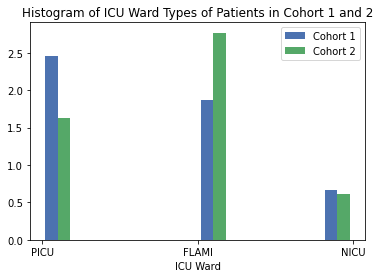

In [35]:
plt.style.use('seaborn-deep')

x = cohort_1_details['icu_ward']
y = cohort_2_details['icu_ward']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("ICU Ward")
# plt.ylabel("Proportion")
plt.title("Histogram of ICU Ward Types of Patients in Cohort 1 and 2")
plt.show()

In [36]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,59
FLAMI,45
NICU,16


In [37]:
cohort_2_monitor = pd.DataFrame(cohort_2_details['icu_ward'].value_counts())
cohort_2_monitor

,icu_ward
FLAMI,1640
PICU,961
NICU,361


In [38]:
# cohort_2_stratified_icu_temp = cohort_2_details[cohort_2_details['icu_ward']=='PICU'].sample(n=961, random_state = 203)
# cohort_2_stratified_icu_temp = cohort_2_stratified_icu_temp.append(cohort_2_details[cohort_2_details['icu_ward']=='FLAMI'].sample(n=733, random_state = 203))
# cohort_2_stratified_icu_temp = cohort_2_stratified_icu_temp.append(cohort_2_details[cohort_2_details['icu_ward']=='NICU'].sample(n=261, random_state = 203))
cohort_2_stratified_icu = cohort_2_details

In [39]:
len(cohort_2_stratified_icu)

2962

In [40]:
cohort_2_stratified_icu["age_category"] = 0


/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_9006/2040661390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_stratified_icu["age_category"] = 0


In [41]:
cohort_1_age = pd.DataFrame(cohort_1_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_2_age = pd.DataFrame(cohort_2_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_1_age

,age (days)
0.0,4.291667
0.1,14.581250
0.2,35.765278
0.3,93.829167
0.4,185.591667
0.5,269.442708
0.6,483.808333
0.7,948.432292
0.8,1746.991667
0.9,4103.604167


In [42]:
max(cohort_2_details['age (days)'])

7163.623611111111

In [43]:
for i, a in zip(cohort_2_stratified_icu.index, cohort_2_stratified_icu["age (days)"]):
    if a < 14.6:
        cohort_2_stratified_icu["age_category"].loc[i] = 1
    if 14.6 <= a < 35.8:
        cohort_2_stratified_icu["age_category"].loc[i] = 2
    if 35.8 <= a < 93.8:
        cohort_2_stratified_icu["age_category"].loc[i] = 3
    if 93.8 <= a < 185.6:
        cohort_2_stratified_icu["age_category"].loc[i] = 4
    if 185.6 <= a < 269.4:
        cohort_2_stratified_icu["age_category"].loc[i] = 5
    if 269.4 <= a < 483.8:
        cohort_2_stratified_icu["age_category"].loc[i] = 6
    if 483.8 <= a < 948.4:
        cohort_2_stratified_icu["age_category"].loc[i] = 7
    if 948.4 <= a < 1747:
        cohort_2_stratified_icu["age_category"].loc[i] = 8
    if 1747 <= a < 4103.6:
        cohort_2_stratified_icu["age_category"].loc[i] = 9
    if 4103.6 <= a < 7164:
        cohort_2_stratified_icu["age_category"].loc[i] = 10

/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
pd.cut(cohort_2_stratified_icu['age (days)'],[0, 14.6, 35.8, 93.8, 185.6, 269.4, 483.8, 948.4, 1747, 4103.6, 7164]).value_counts()


(93.8, 185.6]       377
(1747.0, 4103.6]    367
(4103.6, 7164.0]    327
(35.8, 93.8]        321
(0.0, 14.6]         318
(269.4, 483.8]      280
(948.4, 1747.0]     271
(483.8, 948.4]      267
(185.6, 269.4]      233
(14.6, 35.8]        201
Name: age (days), dtype: int64

In [52]:
cohort_2_stratified_icu_age = cohort_2_stratified_icu.groupby('age_category', group_keys=False).apply(lambda x: x.sample(201))
cohort_2_stratified_icu_age

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,final_datapoint,available_data_duration,age (days),age_category
2570,UI1859,2016-08-12,NaT,Female,1,2016-08-13 16:14:00,2016-08-21 17:22:00,NaN,NaT,1,1.0,2016-08-18 20:00:00,5.0,NaT,FLAMI,1,2016-08-21 16:08:30,2 days 20:08:30,6.833333,1
5334,YY3837,2018-08-10,NaT,Male,1,2018-08-10 22:15:00,2018-08-12 18:00:00,NaN,NaT,1,1.0,2018-08-12 12:00:00,5.0,NaT,NICU,1,2018-08-13 20:23:17,1 days 08:23:17,2.500000,1
2581,LQ1867,2016-08-16,NaT,Female,1,2016-08-17 16:05:00,2016-08-19 15:50:00,NaN,NaT,1,1.0,2016-08-18 02:00:00,5.0,NaT,PICU,5,2016-08-19 17:51:13,1 days 15:51:13,2.083333,1
2097,AO1538,2016-04-30,NaT,Male,1,2016-05-01 06:33:00,2016-05-08 11:51:00,NaN,NaT,1,1.0,2016-05-04 08:00:00,5.0,NaT,PICU,1,2016-05-07 04:37:00,2 days 20:37:00,4.333333,1
5375,YO3873,2018-08-26,NaT,Male,1,2018-08-26 23:00:00,2018-08-31 12:43:00,NaN,NaT,1,1.0,2018-08-28 23:00:00,5.0,NaT,NICU,1,2018-08-31 10:33:29,2 days 11:33:29,2.958333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,PH0167,2004-02-12,NaT,Male,1,2018-04-24 18:22:00,2018-04-28 15:58:00,NaN,NaT,1,1.0,2018-04-27 15:00:00,5.0,NaT,PICU,1,2018-04-28 15:49:44,1 days 00:49:44,5188.625000,10
232,YH0187,2003-06-13,NaT,Male,1,2017-10-06 15:48:00,2017-10-07 15:40:00,NaN,NaT,1,1.0,2017-10-06 19:27:00,5.0,NaT,FLAMI,1,2017-10-07 14:27:58,0 days 19:00:58,5229.810417,10
51,GH0044,2000-04-09,NaT,Male,1,2017-04-22 20:51:00,2017-04-26 14:36:00,NaN,NaT,1,1.0,2017-04-23 12:30:00,5.0,NaT,FLAMI,1,2017-04-26 13:35:19,3 days 01:05:19,6223.520833,10
4524,RD3242,2002-04-04,NaT,Male,1,2017-12-26 20:20:00,2017-12-29 10:00:00,NaN,NaT,1,1.0,2017-12-27 14:00:00,5.0,NaT,PICU,1,2017-12-28 03:08:14,0 days 13:08:14,5746.583333,10


In [ ]:
cohort_4_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,total_visits,age (days)
400,LP0324,2009-07-23,2017-09-18,Female,1,2016-09-17 15:20:00,2016-09-24 14:30:00,1.0,2016-09-19 12:00:00,1,1.0,2016-09-19 12:09:00,5.0,2016-09-20 06:00:00,PICU,1,2615.506250
696,TK0564,2012-11-20,2017-10-31,Female,1,2017-09-22 08:30:00,2017-10-31 10:22:00,1.0,2017-09-23 07:00:00,1,1.0,2017-09-23 07:00:00,5.0,2017-09-24 00:00:00,PICU,1,1768.291667
728,WA0589,2011-10-27,2017-05-15,Male,1,2017-05-08 17:30:00,2017-05-15 19:45:00,1.0,2017-05-09 07:00:00,1,1.0,2017-05-09 07:00:00,5.0,2017-05-09 18:00:00,PICU,1,2021.291667
778,HP0630,2000-08-12,2017-06-03,Male,1,2017-04-08 20:10:00,2017-06-03 16:53:00,1.0,2017-04-10 21:00:00,1,1.0,2017-04-10 21:00:00,5.0,2017-04-11 14:00:00,PICU,1,6085.875000
948,XP0759,2013-03-24,2018-01-15,Male,2,2017-07-11 13:00:00,2017-07-24 14:55:00,1.0,2017-07-14 10:00:00,1,1.0,2017-07-14 10:00:00,5.0,2017-07-16 04:00:00,PICU,2,1573.416667
1284,JL0979,2015-08-15,2018-04-11,Male,2,2018-03-06 21:00:00,2018-04-10 09:53:00,1.0,2018-03-21 12:25:00,1,1.0,2018-03-21 21:00:00,5.0,2018-03-22 14:00:00,PICU,2,949.875000
1467,UU1119,2014-09-28,2018-05-12,Male,1,2018-05-09 18:44:00,2018-05-12 18:47:00,1.0,2018-05-11 10:10:00,1,1.0,2018-05-11 10:10:00,5.0,2018-05-12 05:35:00,PICU,1,1321.423611
1505,CN1142,2011-06-03,2016-07-18,Male,2,2016-05-14 16:48:00,2016-05-25 16:00:00,1.0,2016-05-16 12:00:00,1,1.0,2016-05-16 13:00:00,5.0,2016-05-18 12:00:00,PICU,2,1809.541667
1777,DA1324,2013-10-05,2016-10-28,Female,1,2016-10-06 06:17:00,2016-10-28 22:30:00,1.0,2016-10-23 19:45:00,1,1.0,2016-10-23 19:45:00,3.0,2016-10-23 22:43:00,PICU,1,1114.822917
2189,EK1591,2016-05-16,2016-10-22,Male,1,2016-05-18 17:01:00,2016-08-23 11:30:00,1.0,2016-06-18 01:00:00,1,1.0,2016-06-17 23:00:00,5.0,2018-06-18 08:00:00,NICU,1,32.958333


In [48]:
cohort_1_details.to_csv('cohort_1_details_v5.csv')

In [49]:
cohort_2_stratified_icu_age.to_csv('cohort_2_details_v5.csv')

In [50]:
cohort_3_details.to_csv('cohort_3_details_v5.csv')

In [51]:
cohort_4_details.to_csv('cohort_4_details_v5.csv')

In [ ]:
path = "../In2Research_data/data/"

all_files = glob.glob(path + "/*")

cohort_1_data = {}
cohort_2_data = {}
cohort_3_data = {}

for letter1 in all_files:
    for letter2 in glob.glob(letter1 + "/*"):
        for id in glob.glob(letter2 + "/*"):
            if ntpath.basename(id) in list(cohort_1_details["Project ID"]):
                cohort_1_data[ntpath.basename(id)] = {}
                for file in glob.glob(id + '/*'):
                    cohort_1_data[ntpath.basename(id)][ntpath.basename(file)] = pd.read_csv(file, sep=',')
            # if ntpath.basename(id) in list(cohort_2_stratified_icu_age["Project ID"]):
            #     cohort_2_data[ntpath.basename(id)] = []
            #     for file in glob.glob(id + '/*'):
            #         cohort_2_data[ntpath.basename(id)].append(pd.read_csv(file, sep=','))
            # if ntpath.basename(id) in list(cohort_3_details["Project ID"]):
            #     cohort_3_data[ntpath.basename(id)] = []
            #     for file in glob.glob(id + '/*'):
            #         cohort_3_data[ntpath.basename(id)].append(pd.read_csv(file, sep=','))


            # data[ntpath.basename(id)] = []
            # id_str = ntpath.basename(id)
            # for file in glob.glob(id + '/*'):
            #     data[ntpath.basename(id)].append(pd.read_csv(file, sep=','))
                # pass

#     for file in folder:
#         df = pd.read_csv(filename, index_col=None, header=0)
#         li.append(df)


# PC_0192_details = pd.read_csv("../In2Research_data/data", sep=',')

KeyboardInterrupt: 

In [ ]:
cohort_1_data

{'RZ3023': {'RZ3023_1_Temp.csv':      monitor     record_date_time  num_value
  0       Temp  2017-10-05 07:57:52       37.0
  1       Temp  2017-10-05 07:57:57       37.1
  2       Temp  2017-10-05 07:58:02       37.1
  3       Temp  2017-10-05 07:58:07       37.0
  4       Temp  2017-10-05 07:58:12       37.0
  ...      ...                  ...        ...
  6548    Temp  2017-10-05 17:03:22       37.8
  6549    Temp  2017-10-05 17:03:27       37.8
  6550    Temp  2017-10-05 17:03:32       37.8
  6551    Temp  2017-10-05 17:03:37       37.8
  6552    Temp  2017-10-05 17:03:42       37.8
  
  [6553 rows x 3 columns],
  'RZ3023_2_Pulse.csv':       monitor     record_date_time  num_value
  0       Pulse  2017-10-05 07:57:52        121
  1       Pulse  2017-10-05 07:57:57        124
  2       Pulse  2017-10-05 07:58:02        125
  3       Pulse  2017-10-05 07:58:07        126
  4       Pulse  2017-10-05 07:58:12        122
  ...       ...                  ...        ...
  61074   Pulse  